In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/dataset

/content/gdrive/MyDrive/dataset


In [ ]:
db = pd.read_csv('finaldata.csv', low_memory=False)

In [ ]:
db

,RID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,...,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPDivatt_bl,FDG_bl,AV45_bl
0,514,1038,4,67.5,1,8,1,2,2,0.0,...,1.00000,1.0,2.00000,2.00,1.43590,1.28571,1.0,1.00000,1.19409,0.9851
1,514,772,4,67.5,1,8,1,2,2,0.0,...,1.00000,1.0,2.00000,2.00,1.43590,1.28571,1.0,1.00000,1.19409,0.9851
2,514,663,4,67.5,1,8,1,2,2,0.0,...,1.00000,1.0,2.00000,2.00,1.43590,1.28571,1.0,1.00000,1.19409,0.9851
3,513,689,4,68.5,1,12,1,5,1,0.0,...,1.00000,1.0,1.16667,1.75,1.25641,1.28571,1.0,1.33333,1.52448,0.9940
4,512,795,4,80.2,1,11,1,5,2,1.0,...,1.14286,1.0,1.33333,1.00,1.30769,1.00000,1.0,1.00000,1.18492,1.2437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,152,1578,1,78.0,0,6,1,5,4,0.0,...,1.14286,1.0,1.00000,1.00,1.17949,1.00000,1.0,1.00000,1.28330,0.9642
4086,372,1760,3,75.6,1,10,1,5,0,0.0,...,1.28571,1.0,2.00000,3.00,2.20513,1.00000,1.2,1.00000,1.32418,1.0286
4087,34,1762,2,77.6,0,4,1,5,1,0.0,...,1.28571,2.0,1.33333,1.50,1.46154,1.57143,1.0,1.75000,1.15572,1.0524
4088,445,1761,4,71.2,1,8,1,5,1,0.0,...,1.57143,1.0,1.66667,2.25,1.74359,1.00000,1.0,1.00000,1.17689,1.0115


In [ ]:
db["AGE"].max()

90.3

In [ ]:
db.isnull().sum()

RID                         0
EXAMDATE                    0
DX_bl                       0
AGE                         0
PTGENDER                    0
PTEDUCAT                    0
PTETHCAT                    0
PTRACCAT                    0
PTMARRY                     0
APOE4                       0
CDRSB_bl                    0
ADASQ4_bl                   0
MMSE_bl                     0
LDELTOTAL_BL                0
mPACCdigit_bl               0
mPACCtrailsB_bl             0
FLDSTRENG_bl                0
FSVERSION_bl                0
IMAGEUID_bl                 0
Hippocampus_bl              0
Entorhinal_bl               0
Fusiform_bl                 0
MidTemp_bl                  0
ICV_bl                      0
EcogSPMem_bl                0
EcogSPLang_bl               0
EcogSPOrgan_bl              0
EcogSPTotal_bl              0
ABETA_bl                    0
TAU_bl                      0
PTAU_bl                     0
Years_bl                    0
Month_bl                    0
Month     

In [ ]:
df = db.drop(['RID', 'EXAMDATE','PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'IMAGEUID_bl', 'Years_bl', 'Month_bl', 'M', 'Month'], axis=1)

In [ ]:
df.shape

(4090, 48)

In [ ]:
df['DX_bl'].value_counts()

2    1467
1    1008
3     767
4     468
0     380
Name: DX_bl, dtype: int64

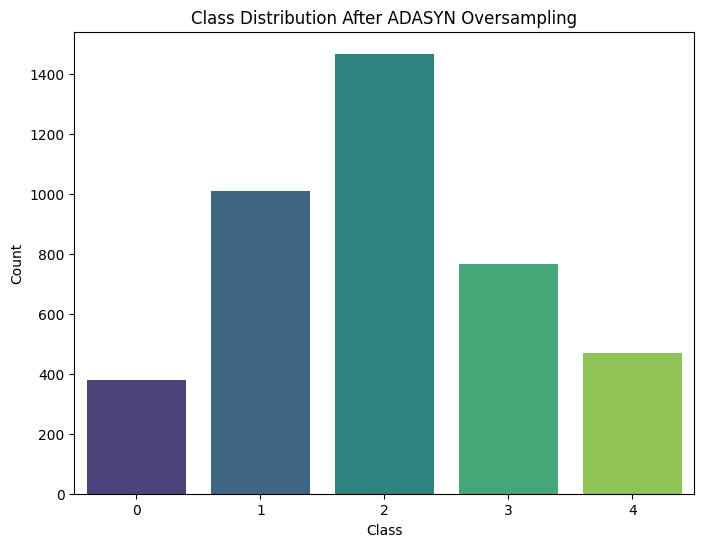

In [ ]:
raw_count = df['DX_bl'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=raw_count.index, y=raw_count, palette='Set3')
plt.title('Class Distribution After ADASYN Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [ ]:
df.corr()

,DX_bl,AGE,PTGENDER,PTMARRY,APOE4,CDRSB_bl,ADASQ4_bl,MMSE_bl,LDELTOTAL_BL,mPACCdigit_bl,...,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPDivatt_bl,FDG_bl,AV45_bl
DX_bl,1.000000,-0.141786,-0.066367,0.024483,-0.013641,-0.291615,-0.139620,0.332758,0.064791,0.224253,...,-0.009781,0.007482,0.009647,0.120520,0.070289,-0.158993,-0.143276,-0.152426,0.256698,-0.068789
AGE,-0.141786,1.000000,0.166033,0.277694,-0.137352,0.046800,0.178311,-0.107960,-0.038217,-0.126767,...,-0.048571,-0.034839,-0.032151,-0.098771,-0.059986,0.071646,0.061059,0.060449,-0.144522,0.197554
PTGENDER,-0.066367,0.166033,1.000000,-0.151715,0.008772,0.013478,0.108325,-0.045887,0.005232,-0.058448,...,-0.056615,0.055252,0.035668,0.044526,0.032414,-0.053633,0.000750,0.071605,-0.115029,-0.070303
PTMARRY,0.024483,0.277694,-0.151715,1.000000,-0.083423,-0.007223,0.039274,-0.010173,-0.052861,-0.036672,...,-0.051243,-0.081009,-0.039445,-0.102800,-0.049883,0.023150,0.013495,-0.000860,-0.027254,0.078055
APOE4,-0.013641,-0.137352,0.008772,-0.083423,1.000000,0.274012,0.296650,-0.272127,-0.292309,-0.330099,...,0.146900,0.133710,0.059799,0.108225,0.154374,0.257540,0.216750,0.232036,-0.271887,0.378442
CDRSB_bl,-0.291615,0.046800,0.013478,-0.007223,0.274012,1.000000,0.580759,-0.667941,-0.697100,-0.749946,...,0.335317,0.322838,0.284904,0.206070,0.355556,0.686662,0.676040,0.620610,-0.534790,0.439320
ADASQ4_bl,-0.139620,0.178311,0.108325,0.039274,0.296650,0.580759,1.000000,-0.603891,-0.674991,-0.865271,...,0.294358,0.253278,0.197334,0.144503,0.293955,0.471792,0.439016,0.418930,-0.479253,0.449527
MMSE_bl,0.332758,-0.107960,-0.045887,-0.010173,-0.272127,-0.667941,-0.603891,1.000000,0.594402,0.875273,...,-0.263703,-0.228558,-0.197531,-0.133143,-0.275514,-0.466107,-0.439472,-0.429348,0.489771,-0.414945
LDELTOTAL_BL,0.064791,-0.038217,0.005232,-0.052861,-0.292309,-0.697100,-0.674991,0.594402,1.000000,0.852507,...,-0.288872,-0.270908,-0.232766,-0.163765,-0.338003,-0.491085,-0.493858,-0.479592,0.436255,-0.489142
mPACCdigit_bl,0.224253,-0.126767,-0.058448,-0.036672,-0.330099,-0.749946,-0.865271,0.875273,0.852507,1.000000,...,-0.324267,-0.287292,-0.240016,-0.168259,-0.346047,-0.549007,-0.525905,-0.509202,0.544054,-0.516938


In [ ]:
df = df.drop(['FLDSTRENG_bl', 'FSVERSION_bl'], axis=1)

In [ ]:
df.corr()

,DX_bl,AGE,PTGENDER,PTMARRY,APOE4,CDRSB_bl,ADASQ4_bl,MMSE_bl,LDELTOTAL_BL,mPACCdigit_bl,...,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPDivatt_bl,FDG_bl,AV45_bl
DX_bl,1.000000,-0.141786,-0.066367,0.024483,-0.013641,-0.291615,-0.139620,0.332758,0.064791,0.224253,...,-0.009781,0.007482,0.009647,0.120520,0.070289,-0.158993,-0.143276,-0.152426,0.256698,-0.068789
AGE,-0.141786,1.000000,0.166033,0.277694,-0.137352,0.046800,0.178311,-0.107960,-0.038217,-0.126767,...,-0.048571,-0.034839,-0.032151,-0.098771,-0.059986,0.071646,0.061059,0.060449,-0.144522,0.197554
PTGENDER,-0.066367,0.166033,1.000000,-0.151715,0.008772,0.013478,0.108325,-0.045887,0.005232,-0.058448,...,-0.056615,0.055252,0.035668,0.044526,0.032414,-0.053633,0.000750,0.071605,-0.115029,-0.070303
PTMARRY,0.024483,0.277694,-0.151715,1.000000,-0.083423,-0.007223,0.039274,-0.010173,-0.052861,-0.036672,...,-0.051243,-0.081009,-0.039445,-0.102800,-0.049883,0.023150,0.013495,-0.000860,-0.027254,0.078055
APOE4,-0.013641,-0.137352,0.008772,-0.083423,1.000000,0.274012,0.296650,-0.272127,-0.292309,-0.330099,...,0.146900,0.133710,0.059799,0.108225,0.154374,0.257540,0.216750,0.232036,-0.271887,0.378442
CDRSB_bl,-0.291615,0.046800,0.013478,-0.007223,0.274012,1.000000,0.580759,-0.667941,-0.697100,-0.749946,...,0.335317,0.322838,0.284904,0.206070,0.355556,0.686662,0.676040,0.620610,-0.534790,0.439320
ADASQ4_bl,-0.139620,0.178311,0.108325,0.039274,0.296650,0.580759,1.000000,-0.603891,-0.674991,-0.865271,...,0.294358,0.253278,0.197334,0.144503,0.293955,0.471792,0.439016,0.418930,-0.479253,0.449527
MMSE_bl,0.332758,-0.107960,-0.045887,-0.010173,-0.272127,-0.667941,-0.603891,1.000000,0.594402,0.875273,...,-0.263703,-0.228558,-0.197531,-0.133143,-0.275514,-0.466107,-0.439472,-0.429348,0.489771,-0.414945
LDELTOTAL_BL,0.064791,-0.038217,0.005232,-0.052861,-0.292309,-0.697100,-0.674991,0.594402,1.000000,0.852507,...,-0.288872,-0.270908,-0.232766,-0.163765,-0.338003,-0.491085,-0.493858,-0.479592,0.436255,-0.489142
mPACCdigit_bl,0.224253,-0.126767,-0.058448,-0.036672,-0.330099,-0.749946,-0.865271,0.875273,0.852507,1.000000,...,-0.324267,-0.287292,-0.240016,-0.168259,-0.346047,-0.549007,-0.525905,-0.509202,0.544054,-0.516938


In [ ]:
X = df.drop(['DX_bl'], axis = 1)
y = df['DX_bl']

In [ ]:
y

0       4
1       4
2       4
3       4
4       4
       ..
4085    1
4086    3
4087    2
4088    4
4089    1
Name: DX_bl, Length: 4090, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
resample = ADASYN(sampling_strategy='all', random_state=20)
x_resample, y_resample = resample.fit_resample(X, y)
y_resample.value_counts()

0    1498
3    1474
2    1467
4    1464
1    1451
Name: DX_bl, dtype: int64

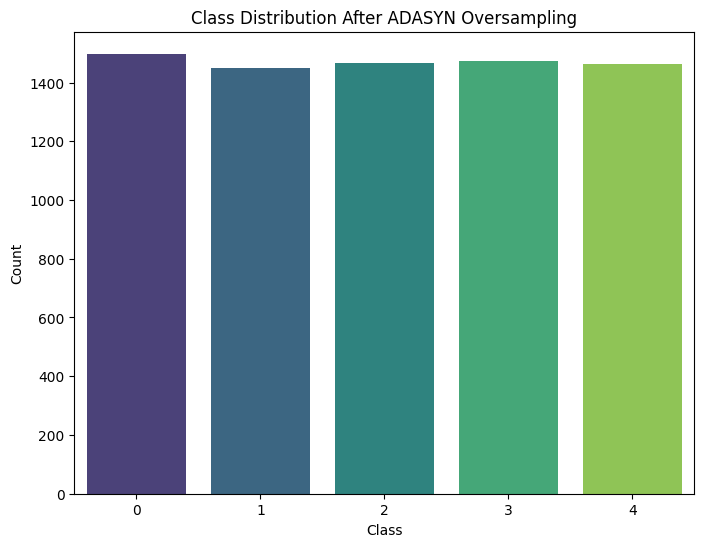

In [ ]:
class_counts = y_resample.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts, palette='Set3')
plt.title('Class Distribution After ADASYN Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scale=[feature for feature in x_resample.columns]
scaler=StandardScaler()
scaler.fit(x_resample[feature_scale])

StandardScaler()

In [ ]:
x_resample

,AGE,PTGENDER,PTMARRY,APOE4,CDRSB_bl,ADASQ4_bl,MMSE_bl,LDELTOTAL_BL,mPACCdigit_bl,mPACCtrailsB_bl,...,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPDivatt_bl,FDG_bl,AV45_bl
0,67.500000,1,2,0.000000,0.000000,1.000000,30.000000,15.000000,3.089730,2.408810,...,1.000000,1.00000,2.000000,2.000000,1.435900,1.285710,1.000000,1.000000,1.194090,0.985100
1,67.500000,1,2,0.000000,0.000000,1.000000,30.000000,15.000000,3.089730,2.408810,...,1.000000,1.00000,2.000000,2.000000,1.435900,1.285710,1.000000,1.000000,1.194090,0.985100
2,67.500000,1,2,0.000000,0.000000,1.000000,30.000000,15.000000,3.089730,2.408810,...,1.000000,1.00000,2.000000,2.000000,1.435900,1.285710,1.000000,1.000000,1.194090,0.985100
3,68.500000,1,1,0.000000,0.000000,3.000000,30.000000,20.000000,3.604220,4.176010,...,1.000000,1.00000,1.166670,1.750000,1.256410,1.285710,1.000000,1.333330,1.524480,0.994000
4,80.200000,1,2,1.000000,0.000000,5.000000,29.000000,10.000000,-3.050020,-3.220930,...,1.142860,1.00000,1.333330,1.000000,1.307690,1.000000,1.000000,1.000000,1.184920,1.243700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7349,71.400000,1,0,0.000000,0.500000,5.000000,30.000000,10.000000,-1.879770,-2.790470,...,1.142860,1.00000,1.666670,1.000000,1.333330,1.600000,1.800000,2.000000,1.333690,0.977100
7350,71.400000,1,0,0.000000,0.500000,5.000000,30.000000,10.000000,-1.879770,-2.790470,...,1.142860,1.00000,1.666670,1.000000,1.333330,1.600000,1.800000,2.000000,1.333690,0.977100
7351,71.400000,1,0,0.000000,0.500000,5.000000,30.000000,10.000000,-1.879770,-2.790470,...,1.142860,1.00000,1.666670,1.000000,1.333330,1.600000,1.800000,2.000000,1.333690,0.977100
7352,77.692048,1,0,0.699116,0.150442,3.601767,28.601767,9.300884,-2.757441,-2.300746,...,1.242729,1.41947,1.433627,1.699116,1.638075,1.280406,1.240707,1.300884,1.160596,1.274294


In [ ]:
import statsmodels.api as sm

In [ ]:
!pip install SHAP probatus lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 10.7 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10761
[LightGBM] [Info] Number of data points in the train set: 5147, number of used features: 45
[LightGBM] [Info] Start training from score -1.586771
[LightGBM] [Info] Start training from score -1.641419
[LightGBM] [Info] Start training from score -1.602082
[LightGBM] [Info] Start training from score -1.610799
[LightGBM] [Info] Start training from score -1.606915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

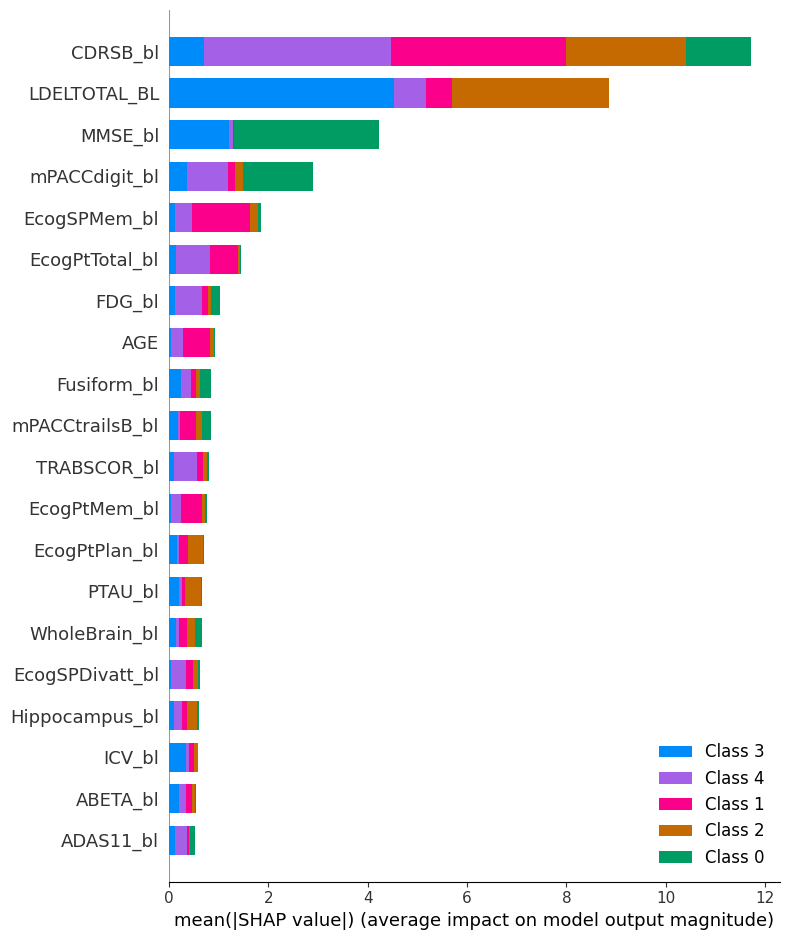

In [ ]:
import shap
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.3, random_state=30)

# Train a LightGBM classifier
lgbm = LGBMClassifier(n_estimators=500, random_state=42)
lgbm.fit(X_train, y_train)

# Calculate the SHAP values for each feature in the test set
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first feature
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=x_resample.columns.tolist())


In [ ]:
# Identify the most important features based on their SHAP values
importance = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(x_resample.columns.tolist(), importance)), columns=['Feature', 'Importance'])
feature_importance['Importance'] = feature_importance['Importance'].apply(lambda x: x.tolist())
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)


# Select the top N features based on their SHAP values
top_features = feature_importance.head(10)['Feature'].values

In [ ]:
feature_importance['Importance']

12    [0.5354088867686784, 0.014469558940127808, 0.0...
32    [0.4518831973982015, 0.02953475271410186, 0.00...
34    [0.3789077744975381, 0.013553048350448741, 0.0...
42    [0.30624290870053555, 0.004287562760282494, 0....
20    [0.2821758620286006, 0.010407388906898782, 0.0...
43    [0.2599623021357922, 0.003454240186384619, 0.0...
7     [0.2472332465149584, 0.01195713738437493, 0.00...
19    [0.21479293318712372, 0.0035721636470846807, 0...
21    [0.20512098232960058, 0.006772327694931855, 0....
15    [0.19709942568818728, 0.006657466740620873, 0....
22    [0.1963694727108649, 0.02290958053583896, 0.15...
40    [0.1891797281938248, 0.007458843975640494, 0.0...
35    [0.18913608905032064, 0.01096321911535388, 0.0...
9     [0.18181246560580686, 0.008378667090797388, 0....
39    [0.1815436220841873, 0.008378667090797388, 0.0...
28    [0.1781494600635344, 0.009888118734718445, 0.0...
33    [0.17593543116076105, 0.012935847908642453, 0....
31    [0.17513332556253008, 0.014012799444301668

In [ ]:
importance_values = feature_importance['Importance'].apply(lambda x: np.mean(x)).values

In [ ]:
importance_values = [x[0] for x in feature_importance['Importance'].values]
feature_names = feature_importance['Feature'].values

In [ ]:
# Sort the feature names and importance values in descending order
sorted_indices = np.argsort(importance_values)[::-1]
sorted_importance_values = [importance_values[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

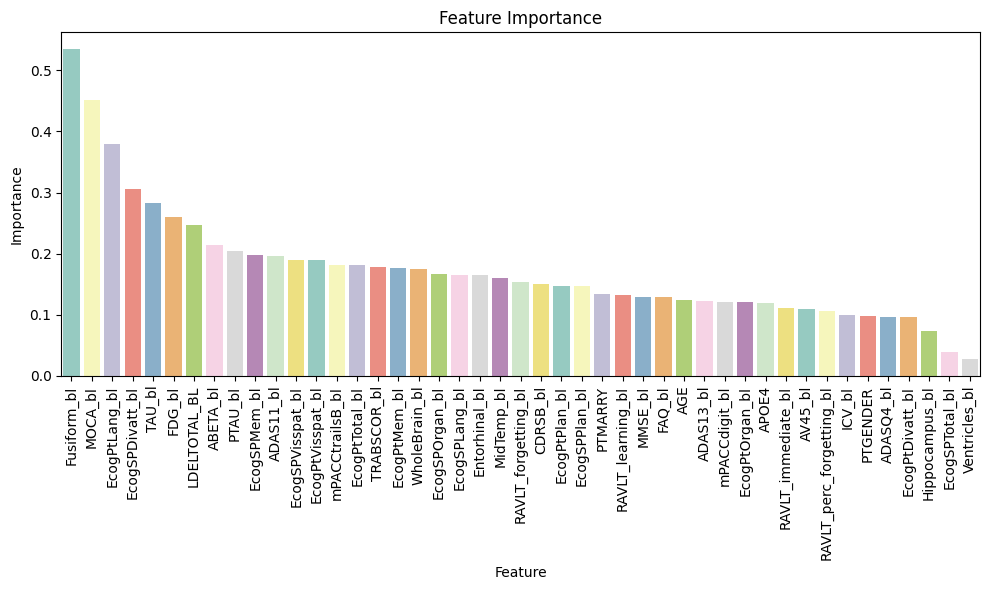

In [ ]:
plt.figure(figsize=(10, 6))

# colors = ['pink', 'powderblue', 'burlywood', 'silver', 'rosybrown', 'y']
bar_width = 2.5  # Adjust the width of the bars
bar_spacing = 1.2  # Adjust the spacing between the bars

# Calculate the positions of the bars
x = np.arange(len(sorted_feature_names))
bar_positions = x * (bar_width + bar_spacing)

#plt.bar(bar_positions, sorted_importance_values, color=colors, width=bar_width)
sns.barplot(x=sorted_feature_names, y=sorted_importance_values, palette='Set3')

#plt.xticks(bar_positions, sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig("Feature_importance_plot.svg", format='svg')
 # Rotate x-axis labels if necessary
plt.show()


In [ ]:
feature_importance.head(20)['Feature'].values

array(['Fusiform_bl', 'MOCA_bl', 'EcogPtLang_bl', 'EcogSPDivatt_bl',
       'TAU_bl', 'FDG_bl', 'LDELTOTAL_BL', 'ABETA_bl', 'PTAU_bl',
       'EcogSPMem_bl', 'ADAS11_bl', 'EcogSPVisspat_bl',
       'EcogPtVisspat_bl', 'mPACCtrailsB_bl', 'EcogPtTotal_bl',
       'TRABSCOR_bl', 'EcogPtMem_bl', 'WholeBrain_bl', 'EcogSPOrgan_bl',
       'EcogSPLang_bl'], dtype=object)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
Y = y_resample.copy()
X = x_resample[feature_importance.head(20)['Feature'].values].copy()

In [ ]:
X = StandardScaler().fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=112, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=112, test_size=0.30)

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [ ]:
i_dnn = Input(shape=(20, ))

x_dnn = Dense(64, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.20)(x_dnn)

x_dnn = Dense(128, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(256, activation='softmax')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(512, activation='softmax')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.30)(x_dnn)

x_dnn = Dense(256, activation='softmax')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(128, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(64, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.20)(x_dnn)

y_dnn = Dense(5, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                            

In [ ]:
import graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image

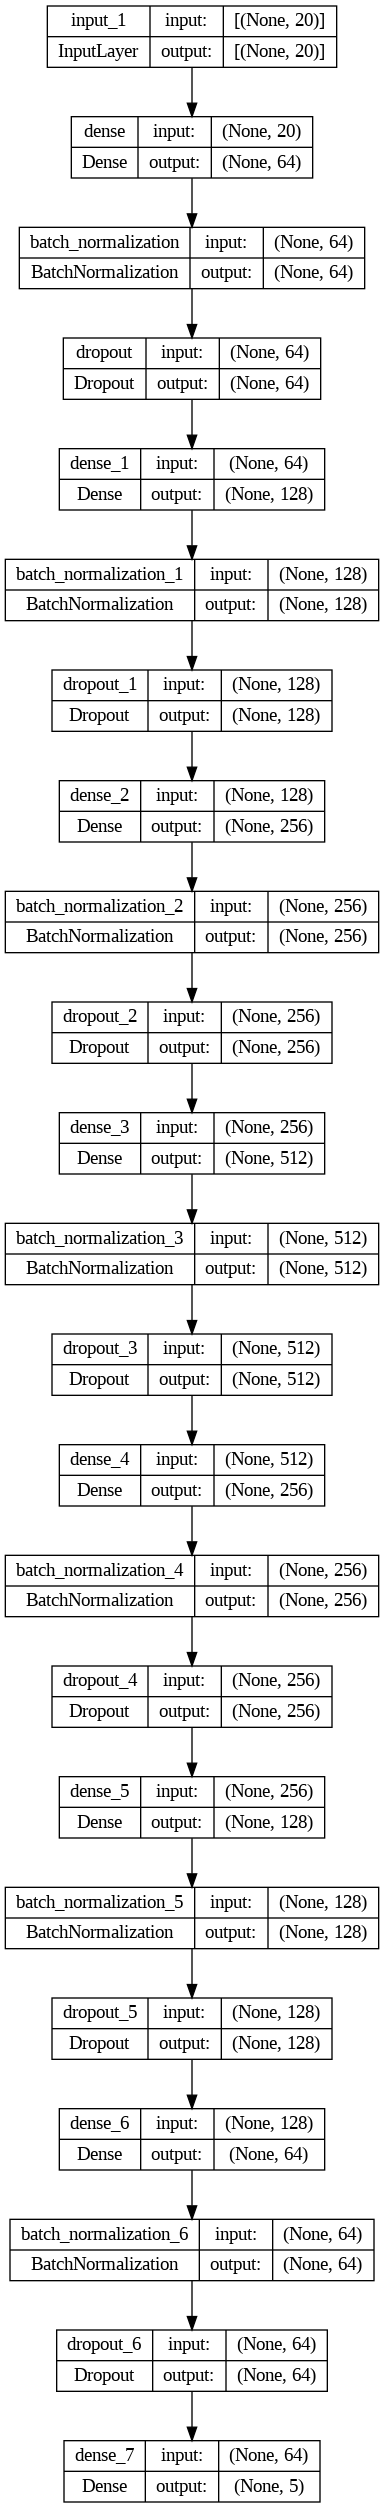

In [ ]:
plot_model(dnn_model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./test1_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

dnn_h = dnn_model.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=100,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/100
112/113 [============================>.] - ETA: 0s - loss: 1.2917 - accuracy: 0.4710
Epoch 1: val_accuracy improved from -inf to 0.20647, saving model to ./test1_dnn_model.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


113/113 [==============================] - 10s 36ms/step - loss: 1.2920 - accuracy: 0.4717 - val_loss: 1.6288 - val_accuracy: 0.2065 - lr: 0.0010
Epoch 2/100
110/113 [============================>.] - ETA: 0s - loss: 0.9008 - accuracy: 0.6162
Epoch 2: val_accuracy did not improve from 0.20647
113/113 [==============================] - 2s 15ms/step - loss: 0.8972 - accuracy: 0.6166 - val_loss: 1.7044 - val_accuracy: 0.1883 - lr: 9.0484e-04
Epoch 3/100
112/113 [============================>.] - ETA: 0s - loss: 0.7540 - accuracy: 0.6928
Epoch 3: val_accuracy did not improve from 0.20647
113/113 [==============================] - 2s 15ms/step - loss: 0.7536 - accuracy: 0.6924 - val_loss: 1.7881 - val_accuracy: 0.1948 - lr: 8.1873e-04
Epoch 4/100
113/113 [==============================] - ETA: 0s - loss: 0.6998 - accuracy: 0.7321
Epoch 4: val_accuracy did not improve from 0.20647
113/113 [==============================] - 2s 16ms/step - loss: 0.6998 - accuracy: 0.7321 - val_loss: 1.7352 - v

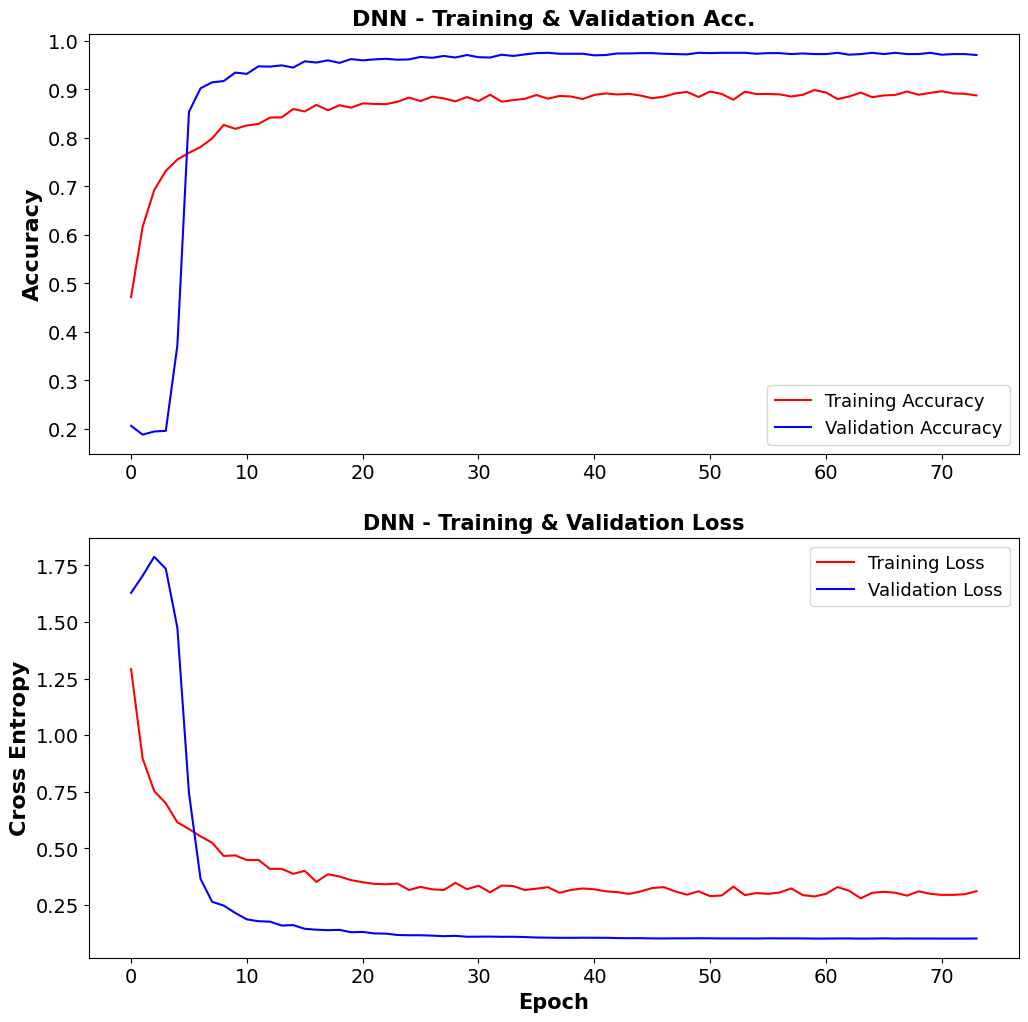

In [ ]:
# Show History
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')
plt.savefig("DNN - Training & Validation Acc.svg", format='svg', bbox_inches="tight")

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.savefig("DNN - Training & Validation Loss.svg", format='svg', bbox_inches="tight")


plt.show()

In [ ]:
dnn_best = load_model('./test1_dnn_model.h5')
dnn_acc = dnn_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.2f}%".format(dnn_acc * 100))

Test Acc. DNN: 97.19%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), dnn_best.predict(x_test))))
y_test2 = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test2, y_pred)
print(classification_report(y_test2, y_pred))

69/69 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       0.94      0.96      0.95       439
           2       0.96      0.99      0.98       453
           3       0.99      0.98      0.98       435
           4       0.97      0.93      0.95       428

    accuracy                           0.97      2207
   macro avg       0.97      0.97      0.97      2207
weighted avg       0.97      0.97      0.97      2207



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap = plt.cm.Purples):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=10)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=8, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=10, weight='bold')
    plt.xlabel('Predicted label', fontsize=10, weight='bold')

Normalized confusion matrix


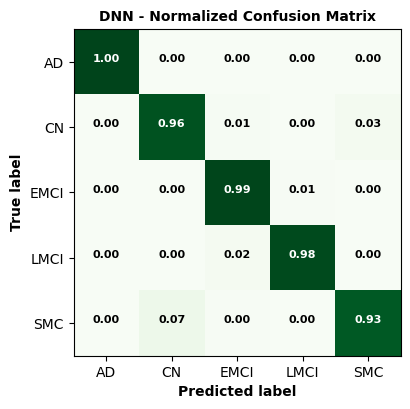

In [ ]:
cnf_matrix = cm
np.set_printoptions(precision=2)

plt.figure(figsize=(4, 4))
plot_confusion_matrix(cnf_matrix, classes = ['AD', 'CN', 'EMCI', 'LMCI', 'SMC'], normalize=True,
                      title='DNN - Normalized Confusion Matrix', cmap = plt.cm.Greens)
plt.savefig("DNN - Normalized Confusion Matrix.svg", format='svg', bbox_inches="tight")

plt.show()

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
y_pred_probs = dnn_best.predict(x_test)
y_true = np.argmax(y_test.values, axis=1)

69/69 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
def calculate_brier_score(y_true, y_pred_probs):
    num_classes = y_pred_probs.shape[1]
    brier_scores = []

    for class_idx in range(num_classes):
        class_true = (y_true == class_idx).astype(float)
        class_pred = y_pred_probs[:, class_idx]
        brier_score = brier_score_loss(class_true, class_pred)
        brier_scores.append(brier_score)

    mean_brier_score = np.mean(brier_scores)
    return mean_brier_score

In [ ]:
brier_score = calculate_brier_score(y_true, y_pred_probs)
print("Brier Score:", brier_score)

Brier Score: 0.009537099855728646


In [ ]:
from sklearn.utils import resample

In [ ]:
n_iterations = 1000
n_samples = len(y_true)
conf_intervals = []

def calculate_accuracy(y_pred, y_true):
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_labels == y_true)
    return accuracy

for _ in range(n_iterations):
    indices = resample(range(n_samples), replace=True)
    sampled_probs = y_pred_probs[indices]
    sampled_labels = y_true[indices]

    accuracy = calculate_accuracy(sampled_probs, sampled_labels)

    conf_intervals.append(accuracy)

In [ ]:
lower_bound = np.percentile(conf_intervals, 2.5)
upper_bound = np.percentile(conf_intervals, 97.5)

print("Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

Confidence Interval: [0.9647, 0.9792]
